In [263]:
import numpy as np 
import matplotlib.pyplot as plt 

In [260]:
class Polynomial2(Function):
    def __init__(self, coeff:list[float], reverse=True)->None:
        self.coeff = [c for c in coeff]
        self.degree = len(coeff) -1
    def __getitem__(self, r):
        if 0<=r<= self.degree:
            return self.coeff[self.degree - r]
        else:
            return 0
    # def __set__(self, r, r_c):
    #     if 0<=r<= self.degree:
    #         return self.coeff[self.degree - r] = r_c
    #     else:
    #         return 0
    def __add__(self, p:Polynomial):
        coeff = [0]*(max(self.degree, p.degree)+1)
        for i in range(len(coeff), -1, -1):
            pass

    def __call__(self, x:float)->float:
        ans = self.coeff[0]
        for c in self.coeff[1:]:
            ans = ans*x + c
        return ans
        
    def derivative(self):
        coeff = [(self.degree - r)*c for r, c in enumerate(self.coeff[:-1])]
        return polynomial(coeff)

    def revderivative(self):
        coeff = [(r+1)*c for r, c in enumerate(self.coeff[:-1])]
        return polynomial(coeff)

    def __repr__(self):
        n = self.degree
        return ' + '.join([f'{c}x^{n-r}' for r, c in enumerate(self.coeff) if c!= 0])

    def __str__(self):
        rep = ''
        for r, c in enumerate(self.coeff):
            sign = '+' if c>0 else '-'
            if c!=0:
                c_abs = abs(c)
                c_abs = '' if (c_abs == 1 and r<self.degree) else f'{c_abs}'
                base = f'x^{self.degree - r}' if r<self.degree else ''
                if r==0 and sign=='+':sign=''
                rep += f' {sign} {c_abs}{base}'
        return rep
    def newton(self, x0, iteration=1):
        x=[x0]
        obj = self.derivative()
        for i in range(iteration):
            deriv = obj(x[i])
            if deriv ==0: deriv = 1e-6
            x.append(x[i] - self(x[i])/deriv)
        return x

    def revnewton(self, x0, iteration=1):
        x=[x0]
        obj = self.revderivative()
        for i in range(iteration):
            deriv = obj(x[i])
            if deriv ==0: deriv = 1e-6
            x.append(x[i] - self(x[i])/deriv)
        return x

In [265]:
def lderivative(f, x, eps=1e-6):
    return (f(x)-f(x-eps))/eps
def rderivative(f, x, eps=1e-6):
    return (f(x+eps)-f(x))/eps
def derivative(f, x, eps=1e-6):
    return 0.5*(f(x+eps)-f(x-eps))/eps

In [264]:
x = np.linspace(0,100,10000)

In [261]:
f = Polynomial([1,0,0])#lambda x: x**2

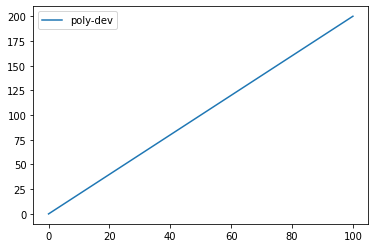

In [269]:
# plt.plot(x, 2*x - lderivative(f,x), label="ldev")
# plt.plot(x, -2*x + rderivative(f,x), label="rdev")
# plt.plot(x, 2*x - derivative(f,x, 1e-6), label="dev")
plt.plot(x, f.derivative()(x), label="poly-dev")
plt.legend()
plt.show()

In [29]:
( 2*x - derivative(f,x, 1e-6)).mean()

2.1879380774151962e-07

In [4]:
lderivative(f, 2), rderivative(f, 2), derivative(f, 2)

(3.999998999582033, 4.0000010006480125, 4.000000000115023)

In [3]:
class Function:
    pass

In [4]:
class RationalPoly(Function):
    def __init__(self,oblique:Polynomial ,numerator:Polynomial, denominator:Polynomial):
        self.num_poly = numerator
        self.denom_poly = denominator
        self.obl_poly = oblique
    def __call__(self, x:float)->float:
        denom = self.denom_poly(x)
        if denom == 0: denom = 1e-6
        return self.obl_poly(x) + self.num_poly(x)/denom
    def __repr__(self):
        return f'({self.obl_poly}) + [{self.num_poly}] / [{self.denom_poly}]'
    def __add__(self, f):
        if isinstance(f, (int, float, Polynomial)):
            return RationalPoly(self.obl_poly + f, self.num_poly, self.denom_poly)
    def derivative(self):
        obl = self.obl_poly.derivative()
        num = self.denom_poly * self.num_poly.derivative() - self.num_poly * self.denom_poly.derivative()
        denom = self.denom_poly * self.denom_poly
        return num/denom + obl


NameError: name 'Polynomial' is not defined

In [307]:
RationalPoly(Polynomial([0]),p,q)

(0) + [x^4 + x^2] / [2x^1]

In [6]:
class Polynomial(Function):
    def __init__(self, coeff:list[float], reverse=True)->None:
        self.coeff = coeff[::-1] if reverse else coeff
        self.degree = len(coeff) -1
    def __getitem__(self, r):
        if 0<=r<= self.degree:
            return self.coeff[r]
        else:
            return 0
    def __setitem__(self, r, r_c):
        if 0<=r<= self.degree:
            self.coeff[r] = r_c
        else:
            pass

    def __add__(self, p):
        if isinstance(p, (int, float)):
            res = Polynomial(self.coeff[::-1])
            res[0] += p
            return res

        coeff = [0]*(max(self.degree, p.degree)+1)
        res = Polynomial(coeff, reverse=False)
        for i in range(len(coeff)):
            res[i] = self[i] + p[i]
        return res

    def __sub__(self, p):
        if isinstance(p, (int, float)):
            res = Polynomial(self.coeff[::-1])
            res[0] -= p
            return res
            
        coeff = [0]*(max(self.degree, p.degree)+1)
        res = Polynomial(coeff, reverse=False)
        for i in range(len(coeff)):
            res[i] = self[i] - p[i]
        return res

    def __mul__(self, p):
        if isinstance(p, (int, float)):
            coeff = [p*c for c in self.coeff]
            res = Polynomial(coeff, reverse=False)
            return res
            
        coeff = [0]*(self.degree + p.degree + 1)
        res = Polynomial(coeff, reverse=False)
        for i in range(self.degree + 1):
            for j in range(p.degree + 1):
                res[i + j] += self[i] * p[j]
        return res

    # def __div__(self, p):
    #     if isinstance(p, (int, float)):
    #         coeff = [c/p for c in self.coeff]
    #         res = Polynomial(coeff, reverse=False)
    #         return res
    #     res = RationalPoly(Polynomial([0]*max(self.degree - p.degree + 1, 1)), self, p)
    #     numd = self.degree
    #     denomd = p.degree
    #     # if self.degree >= p.degree:
            

    #     coeff = [0]*(self.degree + p.degree + 1)
    #     res = Polynomial(coeff, reverse=False)
    #     for i in range(self.degree + 1):
    #         for j in range(p.degree + 1):
    #             res[i + j] += self[i] * p[j]
    #     return res


    def __call__(self, x:float)->float:
        ans = 0
        xp=1
        for c in self.coeff:
            ans = ans + c*xp
            xp = xp * x
        return ans
        
    def derivative(self):
        coeff = [(r+1)*c for r, c in enumerate(self.coeff[1:])]
        return Polynomial(coeff, reverse=False)

    def __repr__(self):
        return self.__str__()
        # return ' + '.join([f'{c}x^{r}' for r, c in enumerate(self.coeff) if c!= 0])

    def __str__(self):
        if self.degree == 0: return f'{self.coeff[0]}'
        rep = ''
        for r, c in enumerate(self.coeff):
            sign = '+' if c>0 else '-'
            if c!=0:
                c_abs = abs(c)
                c_abs = '' if (c_abs == 1 and r>0) else f'{c_abs}'
                base = f'x^{r}' if r>0 else ''
                if r==self.degree and sign=='+':sign=''
                rep = f' {sign} {c_abs}{base}' + rep
        return rep.lstrip()
    def newton(self, x0, iteration=1):
        x=[x0]
        obj = self.derivative()
        for i in range(iteration):
            deriv = obj(x[i])
            if deriv ==0: deriv = 1e-6
            x.append(x[i] - self(x[i])/deriv)
        return x

In [10]:
p = Polynomial([1,-2])
q = Polynomial([1,1])

In [13]:
p=p*p*q -1

In [14]:
p

x^3 - 3x^2 + 3

In [37]:
pn100 = p.newton(1,10)
pn100

[1,
 1.3333333333333333,
 1.347222222222222,
 1.347296353163868,
 1.3472963553338606,
 1.3472963553338608,
 1.3472963553338608,
 1.3472963553338608,
 1.3472963553338608,
 1.3472963553338608,
 1.3472963553338608]

In [38]:
pn100 = np.array(pn100)
pn100 = pn100[1:] - pn100[:-1]
pn100

array([3.33333333e-01, 1.38888889e-02, 7.41309416e-05, 2.16999263e-09,
       2.22044605e-16, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [20]:
pn100c = (pn100[1:])/(pn100[:-1])

/var/folders/j1/d97jc1150z3fx4wh2fp7v7m00000gn/T/ipykernel_60712/1763154661.py:1: RuntimeWarning: invalid value encountered in divide
  pn100c = (pn100[1:])/(pn100[:-1])


In [21]:
pn100c

array([6.30007631e-01, 5.75985239e-01, 4.49498148e-01, 2.34142430e-01,
       5.43308288e-02, 2.89347665e-03, 8.36078722e-06, 0.00000000e+00,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
      

In [333]:
import random


In [385]:
X = [random.random() for _ in range(10000)]
X = np.array(X)
F = lambda x: (X < x).mean()
x = np.linspace(0,1,200)
y = np.array([F(a) for a in x])

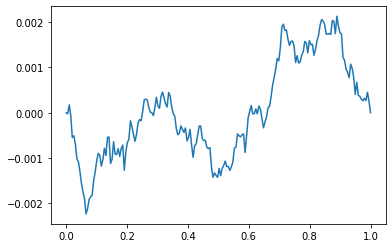

In [386]:
plt.plot(x,u)
# plt.plot(x,x)

In [387]:
u = (n * u + y - x)/(n+1)
n = n + 1

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [41]:
x = np.linspace(-10, 10, 1000)
fp = 2*(1- norm.cdf(x))**2
fn = 2*(norm.cdf(x))**2

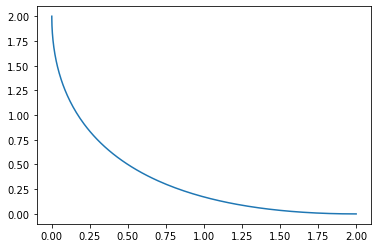

In [42]:
plt.plot(fp, fn)
plt.show()

In [195]:
n1 = np.random.randn(100000)
n2 = np.random.randn(100000)
n3 = n1 + n2

In [137]:
def cdf(dist, x):
    return (dist<=x).mean()

In [198]:
c=0.8

In [196]:
n4 = n1[n3<0] # N1 given N3 < 0
n5 = n1[n3>0] # N1 given N3 > 0

In [144]:
1 - norm.cdf(c)

0.21185539858339664

In [146]:
1 - cdf(n4, c) # P(N1>c | N3 <0)

0.04486514522821572

In [199]:
n6 = n3[n1>c] # N3 given N1>c

In [200]:
cdf(n6, 0)

0.10333651096282173

In [202]:
x = np.linspace(-3, 3, 1000)

In [241]:
n6c = np.array([cdf(n3[n1>c],0) for c in x])
n6p = (n6c[1:]-n6c[:-1])/(x[1]-x[0])

In [203]:
fp = [1 - cdf(n4, c) for c in x]
fn = [cdf(n5, c) for c in x]

In [219]:
n4c = np.array([cdf(n4,c) for c in x])
n4p = (n4c[1:]-n4c[:-1])/(x[1]-x[0])

In [230]:
norm.cdf(c)

0.7881446014166034

In [240]:
cdf(n6, 1.359)

0.5000476644423261

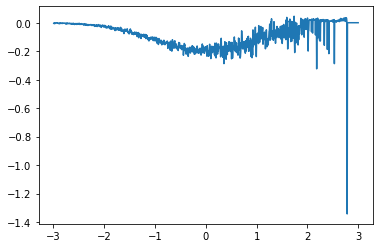

In [243]:
plt.plot(x[1:], n6p)

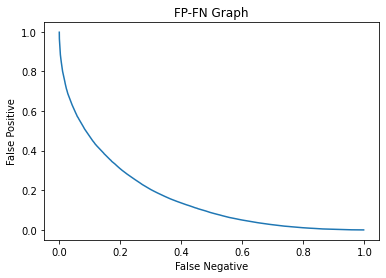

In [215]:
plt.plot(fp, fn)
plt.xlabel("False Negative")
plt.ylabel("False Positive")
plt.title("FP-FN Graph")
plt.show()

In [254]:
fp1 = [(1 - norm.cdf(c))**2 for c in x]
fn1 = [norm.cdf(c) for c in x]

In [255]:
(np.array(fp) - np.array(fp1)).mean()

-0.0009341539766762321

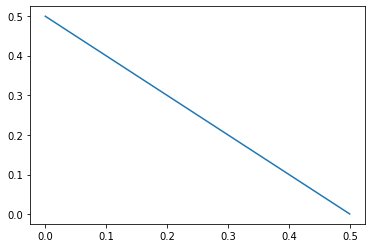

In [261]:
fp3 = [0.5 - 0.5*norm.cdf(c) for c in x]
fn3 = [0.5*norm.cdf(c) for c in x]
plt.plot(fp3, fn3)

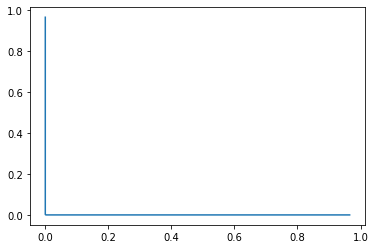

In [259]:
fp4 = [1 -cdf(n3[n3<0], c) for c in x]
fn4 = [cdf(n3[n3>0], c) for c in x]
plt.plot(fp4, fn4)

In [260]:
n3[n3>0].shape

(50064,)